In [1]:
# Import panda to read the data
import pandas as pd
df = pd.read_csv('~/workspace/dat11syd/lessons/lesson-07/hwk/seattleWeather_1948-2017.csv', parse_dates=[0])

In [2]:
# verify what the data looks like
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
#sort data frame by date
#df = df.sort_values('DATE', ascending=True)

In [4]:
# resetting the index after ascending by date
#df.reset_index(drop=True)

In [5]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [6]:
# check and deal with null values
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [7]:
# drop the null values
df2 = df.dropna(axis=0, how='any')

In [8]:
# check for nulls
df2.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [9]:
# Given we're working with logestic regression, setting rain to a boolean
dummies = pd.get_dummies(df2[['RAIN']])
dummies.head()

,RAIN_False,RAIN_True
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [10]:
# create depedent and independent variables where (Y) is new dummy data
feature_col = ['DATE','PRCP', 'TMAX', 'TMIN']
x = df2[feature_col]
y = dummies['RAIN_True']

In [11]:
#create a new feature
x['T_Diff'] = x['TMAX'] - x['TMIN']

In [12]:
# testing join 
j = pd.concat([x, y], axis=1)

In [18]:
type(j['PRCP'])

pandas.core.series.Series

In [14]:
# investigate for negatives
j[j['T_Diff'] < 0]

,DATE,PRCP,TMAX,TMIN,T_Diff,RAIN_True
1419,1951-11-20,0.08,4,39,-35,1


In [15]:
# Drop Row 1419 which has negative
j.drop(j.index[1419]).describe()

,PRCP,TMAX,TMIN,T_Diff,RAIN_True
count,25547.000000,25547.000000,25547.000000,25547.000000,25547.000000
mean,0.106223,59.545230,44.513602,15.031628,0.426625
std,0.239036,12.768786,8.893126,6.827356,0.494597
min,0.000000,16.000000,0.000000,1.000000,0.000000
25%,0.000000,50.000000,38.000000,10.000000,0.000000
50%,0.000000,58.000000,45.000000,14.000000,0.000000
75%,0.100000,69.000000,52.000000,19.000000,1.000000
max,5.020000,103.000000,71.000000,42.000000,1.000000


In [16]:
# New line whether it rained the previous day and replace the NA with mode and join
j['RDB4'] = j['RAIN_True'].shift(1)

In [17]:
#Prior_Day_Rain.fillna(Prior_Day_Rain.mode()[0])
j2 = j.fillna(j['RDB4'].mode()[0])
j2.head()

,DATE,PRCP,TMAX,TMIN,T_Diff,RAIN_True,RDB4
0,1948-01-01,0.47,51,42,9,1,0.0
1,1948-01-02,0.59,45,36,9,1,1.0
2,1948-01-03,0.42,45,35,10,1,1.0
3,1948-01-04,0.31,45,34,11,1,1.0
4,1948-01-05,0.17,45,32,13,1,1.0


In [18]:
j2.dtypes

DATE         datetime64[ns]
PRCP                float64
TMAX                  int64
TMIN                  int64
T_Diff                int64
RAIN_True             uint8
RDB4                float64
dtype: object

In [19]:
# extract the month to see which month's have more rain than others as a new feature
j2['month'] = pd.DatetimeIndex(j2['DATE']).month

In [20]:
j2.head()

,DATE,PRCP,TMAX,TMIN,T_Diff,RAIN_True,RDB4,month
0,1948-01-01,0.47,51,42,9,1,0.0,1
1,1948-01-02,0.59,45,36,9,1,1.0,1
2,1948-01-03,0.42,45,35,10,1,1.0,1
3,1948-01-04,0.31,45,34,11,1,1.0,1
4,1948-01-05,0.17,45,32,13,1,1.0,1


In [21]:
Rain_in_month = j2.groupby('month')['RAIN_True'].sum()

In [22]:
Rain_in_month

month
1     1298.0
2     1103.0
3     1212.0
4      998.0
5      771.0
6      632.0
7      343.0
8      413.0
9      609.0
10     950.0
11    1264.0
12    1307.0
Name: RAIN_True, dtype: float64

In [23]:
Days_in_a_month = j2.groupby('month')['DATE'].count()

In [24]:
Days_in_a_month

month
1     2170
2     1978
3     2170
4     2100
5     2170
6     2098
7     2170
8     2170
9     2099
10    2170
11    2100
12    2153
Name: DATE, dtype: int64

In [19]:
# Probability of Rain per month convert to a dataframe
pb_Rain = Rain_in_month/Days_in_a_month
pb_Rain = pb_Rain.to_frame().reset_index()
pb_Rain.columns = ['month', 'PR_in_Month']
pb_Rain

NameError: name 'Rain_in_month' is not defined

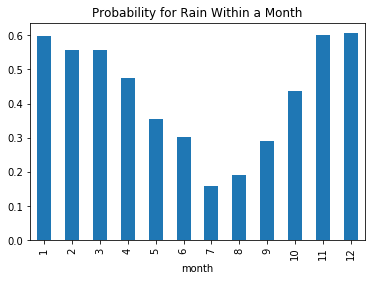

In [27]:
# Probability of Rain per month
pb_Rain.plot(x='month', kind='bar', legend=False, title='Probability for Rain Within a Month')

In [28]:
pb_Rain

,month,PR_in_Month
0,1,0.598157
1,2,0.557634
2,3,0.558525
3,4,0.475238
4,5,0.355300
5,6,0.301239
6,7,0.158065
7,8,0.190323
8,9,0.290138
9,10,0.437788


In [29]:
#Join the probability of rain within a month and add it to data frame
#j2.join(pb_Rain, on='month', how='left', lsuffix='month')
j2 = j2.set_index('month').join(pb_Rain.set_index('month'), lsuffix='month')

In [30]:
j2.head()

,DATE,PRCP,TMAX,TMIN,T_Diff,RAIN_True,RDB4,PR_in_Month
month,,,,,,,,
1,1948-01-01,0.47,51,42,9,1,0.0,0.598157
1,1948-01-02,0.59,45,36,9,1,1.0,0.598157
1,1948-01-03,0.42,45,35,10,1,1.0,0.598157
1,1948-01-04,0.31,45,34,11,1,1.0,0.598157
1,1948-01-05,0.17,45,32,13,1,1.0,0.598157


In [31]:
j2 = j2.reset_index(drop=True)

In [32]:
# import seaborn and plotting library
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [33]:
# Divide the data with data to working_data with and OOS_data 1950-2009 and 2010-2017
#Working_Data = j[j['DATE'] <= "1948-01-02"]
#df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)] We use () to group your boolean vector to remove ambiguity
Working_Data = j2[(j2['DATE'] >= '1950-01-01') & (j2['DATE'] <= '2009-12-31')]
OOS_Data = j2[(j2['DATE'] >= '2010-01-01') & (j2['DATE'] <= '2017-12-31')] 

In [34]:
print(Working_Data.head())
print(OOS_Data.head())

         DATE  PRCP  TMAX  TMIN  T_Diff  RAIN_True  RDB4  PR_in_Month
62 1950-01-01  0.25    32    24       8          1   1.0     0.598157
63 1950-01-02  0.01    24     6      18          1   1.0     0.598157
64 1950-01-03  0.10    26     6      20          1   1.0     0.598157
65 1950-01-04  0.00    28    14      14          0   1.0     0.598157
66 1950-01-05  0.08    38    22      16          1   0.0     0.598157
           DATE  PRCP  TMAX  TMIN  T_Diff  RAIN_True  RDB4  PR_in_Month
1922 2010-01-01  0.40    52    45       7          1   1.0     0.598157
1923 2010-01-02  0.06    47    43       4          1   1.0     0.598157
1924 2010-01-03  0.03    48    39       9          1   1.0     0.598157
1925 2010-01-04  0.98    49    44       5          1   1.0     0.598157
1926 2010-01-05  0.14    50    44       6          1   1.0     0.598157


In [35]:
# variables to work with: alternative x_var = ['PRCP','TMAX','TMIN','T_Diff']
x_var = ['TMAX','TMIN','RDB4','T_Diff']
X = Working_Data[x_var]
Y = Working_Data['RAIN_True']

In [36]:
# Split the working data into training and testing data 
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
#describe the samples
print(X_train.describe())
print(X_test.describe())
print(Y_train.describe())
print(Y_test.describe())

               TMAX          TMIN          RDB4        T_Diff
count  16434.000000  16434.000000  16434.000000  16434.000000
mean      59.326336     44.330839      0.424242     14.995497
std       12.693243      8.837121      0.494243      6.823958
min        4.000000      0.000000      0.000000    -35.000000
25%       50.000000     38.000000      0.000000     10.000000
50%       58.000000     45.000000      0.000000     14.000000
75%       69.000000     52.000000      1.000000     19.000000
max      103.000000     71.000000      1.000000     42.000000
              TMAX         TMIN         RDB4       T_Diff
count  5478.000000  5478.000000  5478.000000  5478.000000
mean     59.588536    44.510953     0.422052    15.077583
std      12.750671     8.796721     0.493932     6.855002
min      16.000000     6.000000     0.000000     1.000000
25%      50.000000    38.000000     0.000000    10.000000
50%      58.000000    45.000000     0.000000    14.000000
75%      69.000000    52.000000     

In [38]:
# fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
# print the coeffiecients
coeff = zip(x_var, logreg.coef_[0])
list(coeff)

[('TMAX', -0.07130917179129119),
 ('TMIN', 0.08531481859595105),
 ('RDB4', 1.0351877263586304),
 ('T_Diff', -0.1566239904115183)]

In [40]:
# Null accuracy which we can get without using a model
print('NULL Accuracy Score:',1- Y_test.mean())

NULL Accuracy Score: 0.571924059875867


In [41]:
#Predict whether it will rain on using the test data. Better score by not using 'PR_in_Month' 
Y_pred = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))

0.7694414019715224


In [42]:
# compare the training and tesd data 
compare1 = pd.DataFrame({'Tested' : Y_test, 'Predicted' : Y_pred})

In [43]:
# %load confusion_matrix_nice.py
# from confusion_matrix_nice import plot_confusion_matrix
%run confusion_matrix_nice

Confusion matrix, without normalization
[[1701  644]
 [ 619 2514]]


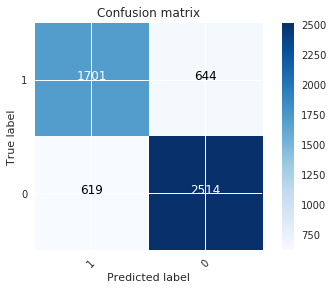

In [44]:
# Create a confusion matrix using the compare1
from sklearn.metrics import confusion_matrix
confusion_matrix(compare1['Tested'], compare1['Predicted'])

# plot an attractive confusion matrix
cnf_mat = metrics.confusion_matrix(Y_test, Y_pred, labels = Working_Data.RAIN_True.unique())
class_labels = Working_Data.RAIN_True.unique()
plt.figure()
plot_confusion_matrix(cnf_mat, class_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
plt.show()

In [45]:
# Provide a matrix with labels
df_confusion = pd.crosstab(compare1['Tested'], compare1['Predicted'])
df_confusion

Predicted,0,1
Tested,,
0,2514,619
1,644,1701


In [46]:
# Test on the out of sample data (OOS_Data = 2010-2017) 
X_OOS = OOS_Data[x_var]
Y_OOS = OOS_Data['RAIN_True']
Y_pred_OOS = logreg.predict(X_OOS)
print(metrics.accuracy_score(Y_pred_OOS, Y_OOS))

0.770051635111876


In [47]:
# plot the OOS data into actual and predicted to be used in a confusion matrix
compare2 = pd.DataFrame({'Actual' : Y_OOS, 'Predicted' : Y_pred_OOS})

Confusion matrix, without normalization
[[ 974  326]
 [ 342 1263]]


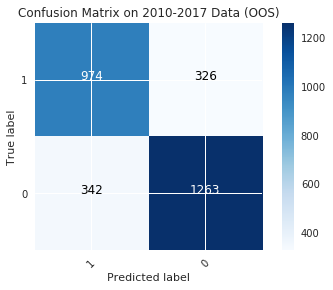

Accuracy Score: 0.770051635111876


In [48]:
# Create a confusion matrix using OOS data
confusion_matrix(compare2['Actual'], compare2['Predicted'])

# plot an attractive confusion matrix
cnf_mat = metrics.confusion_matrix(Y_OOS, Y_pred_OOS, labels = OOS_Data.RAIN_True.unique())
class_labels = OOS_Data.RAIN_True.unique()
plt.figure()
plot_confusion_matrix(cnf_mat, class_labels,
                          normalize=False,
                          title='Confusion Matrix on 2010-2017 Data (OOS)',
                          cmap=plt.cm.Blues)
plt.show()
print("Accuracy Score:", metrics.accuracy_score(Y_pred_OOS, Y_OOS))

In [49]:
print("True Positive", 974/(342+974))
print("True Negative", 1263/(1263+326))

True Positive 0.7401215805471124
True Negative 0.7948395217117684


In [50]:
# store the predicted probabilities
Y_pred_OOS_prob = logreg.predict_proba(X_OOS)[:, 1]

Text(0,0.5,'Frequency')

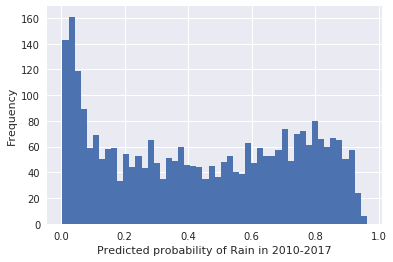

In [51]:
# plot the predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(Y_pred_OOS_prob, bins=50)
plt.xlabel('Predicted probability of Rain in 2010-2017')
plt.ylabel('Frequency')

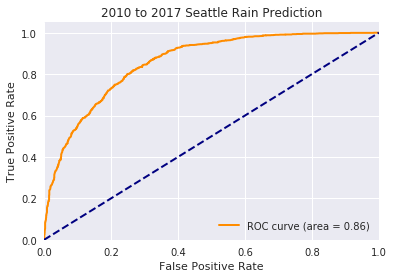

In [52]:
# Generate the ROC curve for our new model

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds2 = logreg.predict_proba(X_OOS)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(Y_OOS, preds2)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr,tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('2010 to 2017 Seattle Rain Prediction')
plt.legend(loc="lower right")
plt.show()

SUMMARY 

The model has a 77% overall accuracy rate when predicting whether or not it rained on a particular day.
For days when it rained, it was 74% at predicting this while it was better at predicting days when it
didn't rain, at 79%. 
ROC curve scored 0.86